# Nonlinear

Nonlinear classification is a fascinating concept in the field of machine learning, where we explore ways to categorize or classify data points that don't follow a simple straight line.
In [linear classification](linear.ipynb), we assume that our data can be neatly separated by a straight line, but real-world scenarios are often more complex.

Imagine you have a set of data points representing different types of objects, like apples and oranges.
In linear classification, you might use a straight line to separate apples on one side and oranges on the other.
However, what if the data is more intricate, and a straight line doesn't do justice to the relationships between features?

![](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8a_dataonly.png)

Nonlinear classification steps in to handle such situations.
Instead of restricting ourselves to straight lines, we embrace more sophisticated methods that can handle curved or complex boundaries.
This allows us to capture intricate patterns and relationships within the data.

Picture a scenario where you're trying to distinguish between different shapes in a 2D space.
Linear classification might struggle if the shapes are circular or have irregular boundaries.
Nonlinear classification methods, like support vector machines with kernel functions, decision trees, and neural networks, enable us to draw boundaries that can flex and curve, adapting to the shape of the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CSV_PATH = "https://gitlab.com/oasci/courses/pitt/biosc1540-2024s/-/raw/main/biosc1540/files/csv/mushrooms.csv"

df = pd.read_csv(CSV_PATH)

## Encoding

TODO:

In [4]:
df_encoded = df.apply(lambda x: pd.factorize(x)[0])
print(df_encoded)

      class  cap_shape  cap_surface  cap_color  bruises  odor  \
0         0          0            0          0        0     0   
1         1          0            0          1        0     1   
2         1          1            0          2        0     2   
3         0          0            1          2        0     0   
4         1          0            0          3        1     3   
...     ...        ...          ...        ...      ...   ...   
8119      1          4            0          0        1     3   
8120      1          0            0          0        1     3   
8121      1          3            0          0        1     3   
8122      0          4            1          0        1     6   
8123      1          0            0          0        1     3   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                   0             0          0           0  ...   
1                   0             0          1           0  ...   
2                 

## Support Vector Machines

TODO:


In [5]:
df_X = df_encoded.loc[:, df_encoded.columns != "class"]
df_y = df_encoded["class"]

X = df_X.to_numpy()
y = df_y.to_numpy().reshape(-1, 1)

In [6]:
from sklearn import svm

clf = svm.SVC()

In [7]:
clf.fit(X, y)

/home/alex/miniconda3/envs/biosc1540-2024s-dev/lib/python3.11/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [8]:
clf.score(X, y)

0.9992614475627769

## Neural network

TODO:

### Dataset

TODO:

In [4]:
import torch
from torch.utils.data import Dataset

In [5]:
class MushroomDataset(Dataset):
    def __init__(self, dataframe):
        self.features = torch.tensor(
            dataframe.iloc[:, 1:].values, dtype=torch.float32, device="cpu"
        )
        self.labels = torch.tensor(
            dataframe.iloc[:, 0].values, dtype=torch.long, device="cpu"
        )

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return feature, label

In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [7]:
dataset = MushroomDataset(dataframe=df_encoded)

In [8]:
sample_idx = 1
features, label = dataset[sample_idx]
print("Features:", features)
print("Label:", label)

Features: tensor([0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1.])
Label: tensor(1)


### Splitting

TODO:

In [9]:
from torch.utils.data import random_split

gen_1 = torch.Generator().manual_seed(5739)

dset_train, dset_validation, dset_test = random_split(
    dataset, [0.6, 0.2, 0.2], generator=gen_1
)

### Loader

TODO:

In [10]:
batch_size = 4

trainloader = torch.utils.data.DataLoader(
    dset_train, batch_size=batch_size, shuffle=True, num_workers=2
)

### Model

TODO:

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class MushroomClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MushroomClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

In [12]:
input_size = len(dset_train[0][0])
hidden_size = 64
output_size = 2  # Binary classification (poisonous or edible)

model = MushroomClassifier(input_size, hidden_size, output_size).to(device)

### Optimizer

TODO:

In [13]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Loss

TODO:

In [14]:
criterion = nn.CrossEntropyLoss()

### Train

In [17]:
losses = []
n_epochs = 50
for epoch in range(n_epochs):  # loop over the dataset multiple times
    epoch_loss = 0.0  # Initialize epoch loss

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(trainloader)
    losses.append(avg_epoch_loss)

print("Finished Training")

Finished Training


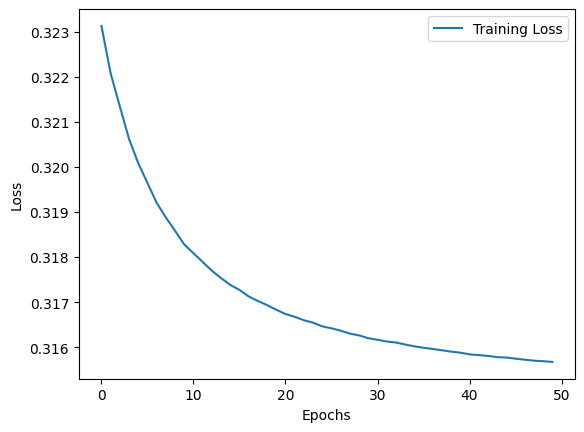

In [18]:
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()